# Imports

In [1]:
import sklearn.neural_network._multilayer_perceptron as mlp
import pyarrow as pa
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
import sklearn.model_selection as model_selection
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as preprocessing
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
import pandas as pd

# Custom Functions

## Train Validate Test Split
Custom function to split the dataset into 3 parts

In [2]:
def train_validate_test_split(X, y, training_size, validate_size) -> tuple:
    X_train, X_validate_test, y_train, y_validate_test = train_test_split(X, y, train_size=training_size)
    
    X_validate, X_test, y_validate, y_test = train_test_split(X_validate_test, y_validate_test, train_size=(validate_size/training_size))
    
    return X_train, X_validate, X_test, y_train, y_validate, y_test

In [3]:
#list of all activation functions
activation_functions = ['identity', 'logistic', 'tanh', 'relu']

#list of all solvers
solvers = ['lbfgs', 'sgd', 'adam']

#list of all learning rates
learning_rates = ['constant', 'invscaling', 'adaptive']

#list of all alphas
alphas = [0.0001, 0.001, 0.01, 0.1, 1]

#list of all hidden layer sizes
hidden_layer_sizes = [(100,), (100, 100), (100, 100, 100)]

#list of all max iterations
max_iterations = [100, 200, 300, 400, 500]

#list of all early stopping
early_stopping = [True, False]

#list of all validation fractions
validation_fractions = [0.1, 0.2, 0.3, 0.4, 0.5]

#list of all n_iter_no_change
n_iter_no_changes = [5, 10, 15, 20, 25]

#list of all verbose
verboses = [True, False]

#list of all learning rate inits
learning_rate_inits = [0.0001, 0.001, 0.01, 0.1, 1]

#list of all random states
random_states = [1, 2, 3, 4, 5]

#list of all test sizes
test_sizes = [0.1, 0.2, 0.3, 0.4, 0.5]

#list of all training sizes
training_sizes = [0.1, 0.2, 0.3, 0.4, 0.5]

#list of all validate sizes
validate_sizes = [0.1, 0.2, 0.3, 0.4, 0.5]

model = mlp.MLPClassifier(hidden_layer_sizes=(100, 100, 100), \
    activation='relu', solver='adam', max_iter=1000, random_state=1, \
        learning_rate='adaptive', learning_rate_init=0.01, alpha=0.0001, \
            early_stopping=True, validation_fraction=0.1, n_iter_no_change=10, verbose=True)
# model = mlp.MLPRegressor()

# Data preparation

## Import the dataset
Import the dataset into a pandas dataframe

In [4]:
dataset = pd.read_csv('UNSW_NB15.csv')
dataset.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,...,1,3,0,0,0,2,3,0,Normal,0


In [5]:
# take a sample of the data
dataset = dataset.sample(frac=0.1)


# clean the data
dataset = dataset.drop_duplicates()
dataset = dataset.dropna()
dataset = dataset.drop(columns=['attack_cat'])
dataset = pd.get_dummies(dataset, columns=['proto', 'service', 'state'])
dataset.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,service_snmp,service_ssh,service_ssl,state_ACC,state_CON,state_ECO,state_FIN,state_INT,state_REQ,state_RST
124634,0.000010,2,0,1064,0,100000.0025,254,0,425600000.0,0.0,...,False,False,False,False,False,False,False,True,False,False
229369,0.000006,2,0,114,0,166666.6608,254,0,76000000.0,0.0,...,False,False,False,False,False,False,False,True,False,False
55829,0.000004,2,0,114,0,250000.0006,254,0,114000000.0,0.0,...,False,False,False,False,False,False,False,True,False,False
236892,0.000009,2,0,114,0,111111.1072,254,0,50666664.0,0.0,...,False,False,False,False,False,False,False,True,False,False
199960,0.000009,2,0,200,0,111111.1072,254,0,88888888.0,0.0,...,False,False,False,False,False,False,False,True,False,False


# Training model

In [6]:
X = dataset.drop(columns=['label'])
y = dataset['label']

In [7]:
X_train, X_validate, X_test, y_train, y_validate, y_test = train_validate_test_split(X, y, 0.7, 0.15)

In [8]:
model.fit(X_train, y_train)

MLPClassifier()

# Validating model

In [9]:
y_pred = model.predict(X_validate)

0.649746192893401


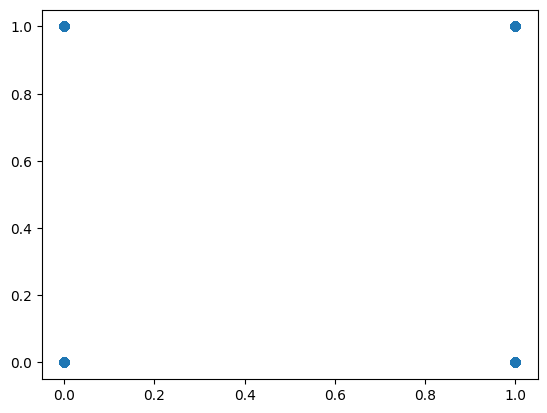

In [10]:
print(metrics.accuracy_score(y_validate, y_pred))

# Predicting